# Laboratory exercise 6

The notebook contains exercises connected to auditory exercise 7. For any questions feel free to contact assistant: eda.jovicic@fer.hr

The main task of this notebook is to make predictions using supported learning with the Scikit Learn library. The goal is to predict the grade in Math considering other features of the student.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, f1_score, balanced_accuracy_score

In [2]:
import warnings
warnings.filterwarnings('ignore')

1. Load the cleaned dataset from the first exercise. If you haven't saved the dataset, rerun the exercise and save the final dataset.

In [3]:
file_path = r"C:\Users\ONE\OneDrive - FFUNIZG\Radna površina\Faks\CogSci\DataScience\data\student_data1.csv"
df = pd.read_csv(file_path)

In [4]:
df

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,Gender_female,Gender_male,LunchType_free/reduced,LunchType_standard
0,female,2,1,standard,1,1,1,1,3.0,1,1,71,71,74,1.0,0.0,0.0,1.0
1,female,2,5,standard,1,0,0,1,0.0,0,0,72,86,82,1.0,0.0,0.0,1.0
2,female,4,0,free/reduced,1,2,1,1,0.0,1,1,74,77,68,1.0,0.0,0.0,1.0
3,male,1,1,free/reduced,1,1,2,1,4.0,0,2,62,52,53,1.0,0.0,0.0,1.0
4,female,2,0,free/reduced,1,1,2,0,2.0,0,0,79,89,82,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29112,male,2,2,standard,1,2,2,0,1.0,0,2,79,74,69,1.0,0.0,0.0,1.0
29113,male,2,2,standard,1,1,1,1,2.0,1,1,66,63,57,1.0,0.0,0.0,1.0
29114,female,2,2,free/reduced,0,1,2,1,3.0,1,2,38,57,59,1.0,0.0,0.0,1.0
29115,female,3,0,standard,1,1,1,1,1.0,0,0,53,69,67,1.0,0.0,0.0,1.0


2. Transform the MathScore feature into grades (1-5) using the following scoring system:

|   MathScore |  Grade  |
| ----------- | ------- |
|  88 - 100   |    5    |
|  75 - 87    |    4    |
|  63 - 74    |    3    |
|  50 - 62    |    2    |
|   0 - 49    |    1    |

In [5]:
df.loc[df['MathScore'] < 50, 'MathScore'] = 1

In [6]:
for limit, grade in zip([88,75,63,50], range(5,1,-1)):
    df.loc[df["MathScore"]>=limit,"MathScore"] = grade

In [7]:
df.groupby("MathScore").EthnicGroup.count()

MathScore
1    4016
2    7393
3    8503
4    6626
5    2579
Name: EthnicGroup, dtype: int64

In [8]:
df.groupby("MathScore").EthnicGroup.count().sum()

29117

3. Divide the dataset into features (X) and predictions (y). For features we will use all the columns except MathScore, ReadingScore and WritingScore. For predictions we will use the MathScore column. Split the dataset into training and testing sets. The split should be done in a  70-30% ratio.

In [9]:
#Original columns which have been OneHotEncoded are now dropped. The encoded columns remain.
df.drop(["Gender", "LunchType"], axis=1, inplace=True)

In [10]:
df.columns

Index(['EthnicGroup', 'ParentEduc', 'TestPrep', 'ParentMaritalStatus',
       'PracticeSport', 'IsFirstChild', 'NrSiblings', 'TransportMeans',
       'WklyStudyHours', 'MathScore', 'ReadingScore', 'WritingScore',
       'Gender_female', 'Gender_male', 'LunchType_free/reduced',
       'LunchType_standard'],
      dtype='object')

In [11]:
#X (all features except MathScore, ReadingScore, WritingScore) and y (MathScore)
X_df = df.loc[:, ~df.columns.isin(["MathScore","ReadingScore","WritingScore"])]
y_df = df.MathScore

In [12]:
#splitting the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.3, random_state=42)

4. Create a Random Forest model, with max_depth=5 and n_estimators=20. Train the model using training set, and then test it on testing set. Display the confusion matrix. Show precision, recall and F1 score for all grades. 

In [13]:
#Random Forest model
clf = RandomForestClassifier(max_depth=5, random_state=42, n_estimators=20)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [14]:
df.MathScore.value_counts()

MathScore
3    8503
2    7393
4    6626
1    4016
5    2579
Name: count, dtype: int64

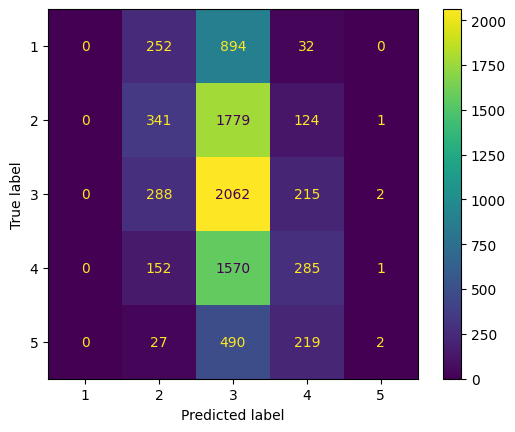

In [15]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=range(1,6)).plot()

In [22]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00      1178
           2       0.32      0.15      0.21      2245
           3       0.30      0.80      0.44      2567
           4       0.33      0.14      0.20      2008
           5       0.33      0.00      0.01       738

    accuracy                           0.31      8736
   macro avg       0.26      0.22      0.17      8736
weighted avg       0.27      0.31      0.23      8736



5. The accuracy of our model is not the best. The reason could be having too many possible classes (grades). Let's transform the data again, but this time, instead of predicting grades, we want to predict whether the student will pass (grades 2, 3, 4 and 5) or fail (grade 1) math. After transforming the MathScore accordingly (0 - failed, 1 - passed), repeat task 4 and compare the results.

In [16]:
#transform grades into failed (0) or passed (1)
df2 = df.copy()
df2.loc[df2["MathScore"] == 1, "MathScore"] = 0
df2.loc[df2["MathScore"] > 0, "MathScore"] = 1

In [17]:
df2.MathScore.value_counts()

MathScore
1    25101
0     4016
Name: count, dtype: int64

In [18]:
X_df2 = df2.loc[:, ~df2.columns.isin(["MathScore","ReadingScore","WritingScore"])]
y_df2 = df2.MathScore

In [19]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_df2, y_df2, test_size=0.3, random_state=42)

In [20]:
#Random Forest model
clf2 = RandomForestClassifier(max_depth=5, random_state=42, n_estimators=20)
clf2.fit(X_train2, y_train2)
y_pred2 = clf2.predict(X_test2)

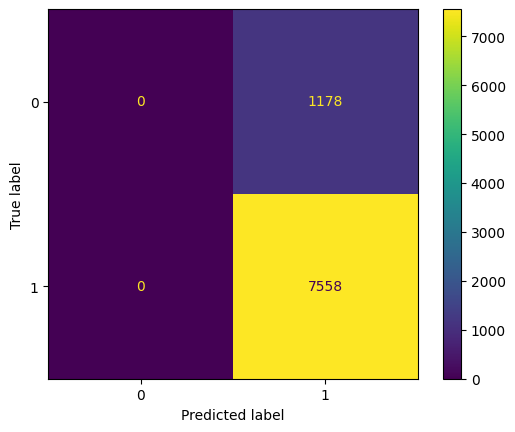

In [21]:
cm2 = confusion_matrix(y_test2, y_pred2)
ConfusionMatrixDisplay(cm2).plot()

In [23]:
print(classification_report(y_test2,y_pred2))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1178
           1       0.87      1.00      0.93      7558

    accuracy                           0.87      8736
   macro avg       0.43      0.50      0.46      8736
weighted avg       0.75      0.87      0.80      8736



6. Compare the results. Did our model work better in the first case or the second? Explain why and suggest a way to improve it.

Although performing different tasks - the first model performing multiclass classification, the second only binary classification - and although the performance metrics of the models are seemingly very different, as visible in the confusion matrices and the distribution of MathScore values in the data, both actually suffer from a similar problem of predicting the dominant value most of the time, rarely straying away from it.
The models are in this sense very conservative: the first is predicting class 3 almost 80% percent of the trials (althought the actual frequency of this class is less than 30% in the population. The second model is in this sense, even more extreme - it predicts class 1 for each observation in the test set.

Part of the reason for this behavior by the second classifier is due to the unbalanced data set it deals with - here class 1 forms 86% percent of the overall binary-coded MathScore data. Combining this with a relatively shallow max_depth parameter - since tree-based classification returns the predicted value based on majority vote in the final leaf where the observation is situated (and a RandomForest Classifier performs majority voting once more when aggregating the scores of multiple trees) - it follows that the classifiers, at least with the parameters used, are not able to find the relevant distinctions in the data to somewhat successfully separate it into classes.

### Optional

The code for investigating the effects of the max_depth parameter change in both the binary and multiclass classification tasks is shown below.

#### Prediction distribution for binary classification task:

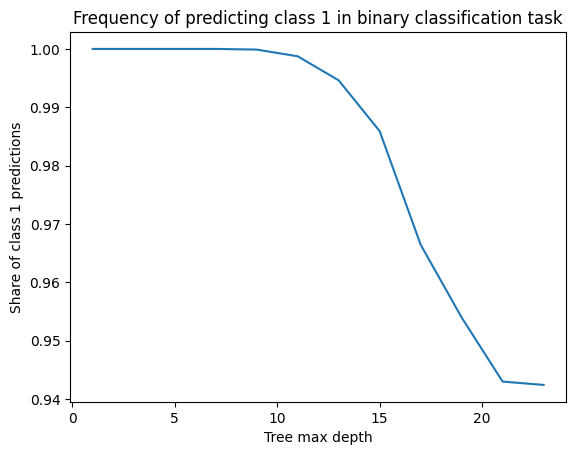

In [52]:
randomforest_maxdepth1 = range(1,24,2)
y_pred1_percent = []
for maxdepth in randomforest_maxdepth1:
    clf_bin = RandomForestClassifier(max_depth=maxdepth, random_state=42, n_estimators=20)
    clf_bin.fit(X_train2,y_train2)
    y_pred_bin = clf_bin.predict(X_test2)
    y_pred1_percent.append(y_pred_bin.sum()/len(y_pred_bin))
plt.plot(randomforest_maxdepth1, y_pred1_percent)
plt.title("Frequency of predicting class 1 in binary classification task")
plt.xlabel("Tree max depth")
plt.ylabel("Share of class 1 predictions")
plt.show()

In [53]:
accuracy_list_bin = []
balanced_accuracy_list_bin = []
for maxdepth in randomforest_maxdepth1:
    clf_bin = RandomForestClassifier(max_depth=maxdepth, random_state=42, n_estimators=20)
    clf_bin.fit(X_train2,y_train2)
    y_pred_bin = clf_bin.predict(X_test2)
    accuracy_list_bin.append(accuracy_score(y_test2, y_pred_bin))
    balanced_accuracy_list_bin.append(balanced_accuracy_score(y_test2,y_pred_bin))

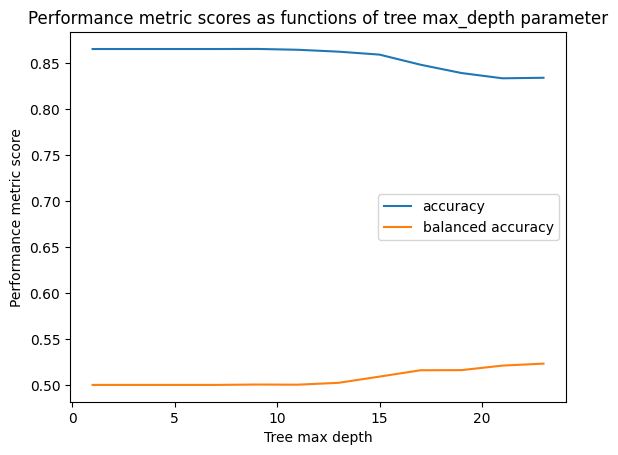

In [62]:
plt.plot(randomforest_maxdepth1, accuracy_list_bin, label="accuracy")
plt.plot(randomforest_maxdepth1, balanced_accuracy_list_bin, label="balanced accuracy")
plt.ylabel("Performance metric score")
plt.xlabel("Tree max depth")
plt.title("Performance metric scores as functions of tree max_depth parameter")
plt.legend()
plt.show()

What is shown above is that by increasing the max_depth parameter of the RandomForest Classifier, a classifier capable of restructuring the data in way that leads to predicting class 0, which forms a very small part of the dataset, can be obtained. However, this procedure does not lead to an increase in the accuracy metric by itself. 

Since the use of such a model may still be beneficial for some intents and purposes, training should be performed using the adequate performance metrics more suited for evaluating models trained on datasets this unbalanced (such as the balanced accuracy shown above).

#### Prediction distribution for the multiclass classification task

In [47]:
randomforest_maxdepth = range(1,24,2)
y_pred_distr = []
for maxdepth in randomforest_maxdepth:
    clf_multi = RandomForestClassifier(max_depth=maxdepth, random_state=42, n_estimators=20)
    clf_multi.fit(X_train,y_train)
    y_pred_multi = clf_multi.predict(X_test)
    y_pred_distr.append(np.bincount(y_pred_multi))

In [48]:
distr_df=pd.DataFrame(y_pred_distr, index=range(1,24,2))
distr_df.drop(0, axis=1, inplace=True)
distr_df.fillna(0)

,1,2,3,4,5
1,0,0,8736,0.0,0.0
3,0,153,8376,207.0,0.0
5,0,1060,6795,875.0,6.0
7,7,1742,5763,1205.0,19.0
9,68,2164,5241,1186.0,77.0
11,198,2369,4642,1374.0,153.0
13,388,2534,4018,1545.0,251.0
15,613,2455,3498,1790.0,380.0
17,831,2407,3108,1953.0,437.0
19,925,2304,3091,1915.0,501.0


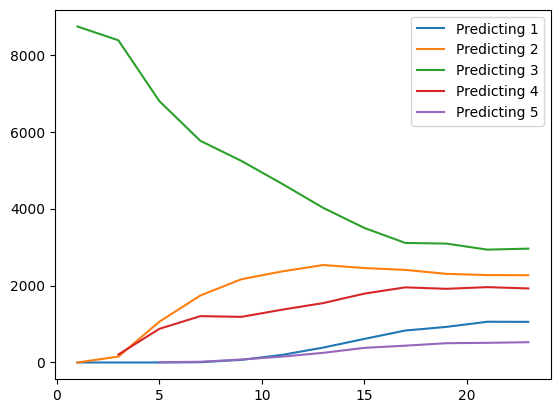

In [49]:
for i in range(0,5):
    plt.plot(randomforest_maxdepth, distr_df.iloc[:,i], label=f"Predicting {i+1}")
plt.legend()
plt.show()

In [50]:
accuracy_list_multi = []
balanced_accuracy_list_multi = []
for maxdepth in randomforest_maxdepth:
    clf_multi = RandomForestClassifier(max_depth=maxdepth, random_state=42, n_estimators=20)
    clf_multi.fit(X_train,y_train)
    y_pred_multi = clf_multi.predict(X_test)
    accuracy_list_multi.append(accuracy_score(y_test, y_pred_multi))
    balanced_accuracy_list_multi.append(balanced_accuracy_score(y_test,y_pred_multi))

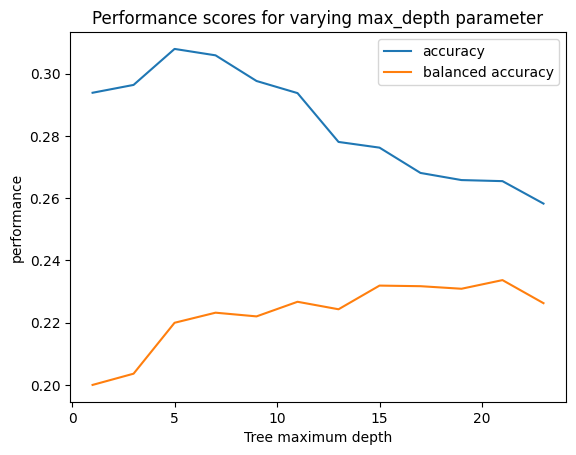

In [63]:
plt.plot(randomforest_maxdepth, accuracy_list_multi, label="accuracy")
plt.plot(randomforest_maxdepth, balanced_accuracy_list_multi, label="balanced accuracy")
plt.ylabel("performance")
plt.xlabel("Tree maximum depth")
plt.title("Performance scores for varying max_depth parameter")
plt.legend()
plt.show()

What is demonstrated above is, once again, how the change in the max_depth parameter leads to the classifier's restructuring of the data in a way which leads to predictions of values other than the dominant one. Here the results of the procedure are shown for a multiclass classification task. As for the binary classification task, the increase in max_depth does not lead to an increase in the accuracy metric. The use of such a model should therefore be evaluated based upon performance scores specifically important for a given purpose.

### Conclusion

What has been shown altogether is that the capacity of a RandomForest Classifier to structure the used feature data in a way that leads to good predictions is limited. It is worth noting that the classification task is being performed on MathScoree data, originally containing 0-100 scores, which has been artificially transformed into discrete 1 through 5 or 0/1 categories. This procedure inevitably lead to some information present in the original data being lost.

Finally and once again, the use of any classifier model similar to the ones developed here should be based on adequate performance metrics more suited for evaluating models trained on datasets with this structure and (un)balance.